# *California Housing Price Prediction*

![image](https://miro.medium.com/v2/resize:fit:671/1*f82SOgbdQOmY5DHmF0kdgw.png)

### *1- Business framing*

##### 1 - What type of Machine‑Learning task is this (supervised, unsupervised, reinforcement)?
***=> Supervised***




##### 2 - Is it a regression or classification problem?
***=> Regression***

##### 3 - Which error metric would you propose first and why? 
***=> RMSE (Root Mean Squared Error) car elle pénalise davantage les grandes erreurs, ce qui est important pour la prédiction de prix immobiliers où les erreurs importantes ont un impact financier significatif.***


##### 4 - When might MAE be preferable?
***=> MAE est préférable quand on veut traiter toutes les erreurs de manière égale, sans pénaliser davantage les grandes erreurs. Utile aussi quand il y a beaucoup d'outliers car MAE est plus robuste aux valeurs aberrantes.***


## 1 | Getting the Data

#### 1.1 Set‑up

In [60]:
import os, tarfile, urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url: str = HOUSING_URL, housing_path: str = HOUSING_PATH):
    """Download & uncompress the California housing dataset."""
    #  ensure local directory exists
    os.makedirs(housing_path, exist_ok=True)

    #  download the archive only if it isn’t already present
    tgz_path = os.path.join(housing_path, "housing.tgz")
    if not os.path.isfile(tgz_path):
        print(" Downloading …")
        urllib.request.urlretrieve(housing_url, tgz_path)

    #  extract csv
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)
    print(" Dataset ready at", housing_path)

In [61]:
fetch_housing_data()

 Dataset ready at datasets/housing


/var/folders/7r/57q1jjz92rq1jvkqjft02y6w0000gn/T/ipykernel_6711/3359881798.py:19: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [62]:
%pip install pandas 
import pandas as pd

def load_housing_data(housing_path: str = HOUSING_PATH) -> pd.DataFrame:
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
print("shape:", housing.shape, "\n")
print("info:", housing.info(), "\n")

shape: (20640, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
info: None 



In [65]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2 | Quick Data Inspection


#### 2.1 Structure & basic stats

In [66]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- Plus grand écart-type (std) : C'est bien median_house_value avec un écart-type d'environ 115 395.

- Valeurs manquantes : Oui, la variable total_bedrooms a des valeurs manquantes. Elle ne compte que 20 433 valeurs non-nulles sur un total de 20 640

- Il y a 20 640 lignes pour 10 colonnes

- D'après le résultat de ton value_counts(), voici la répartition pour ocean_proximity :
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5

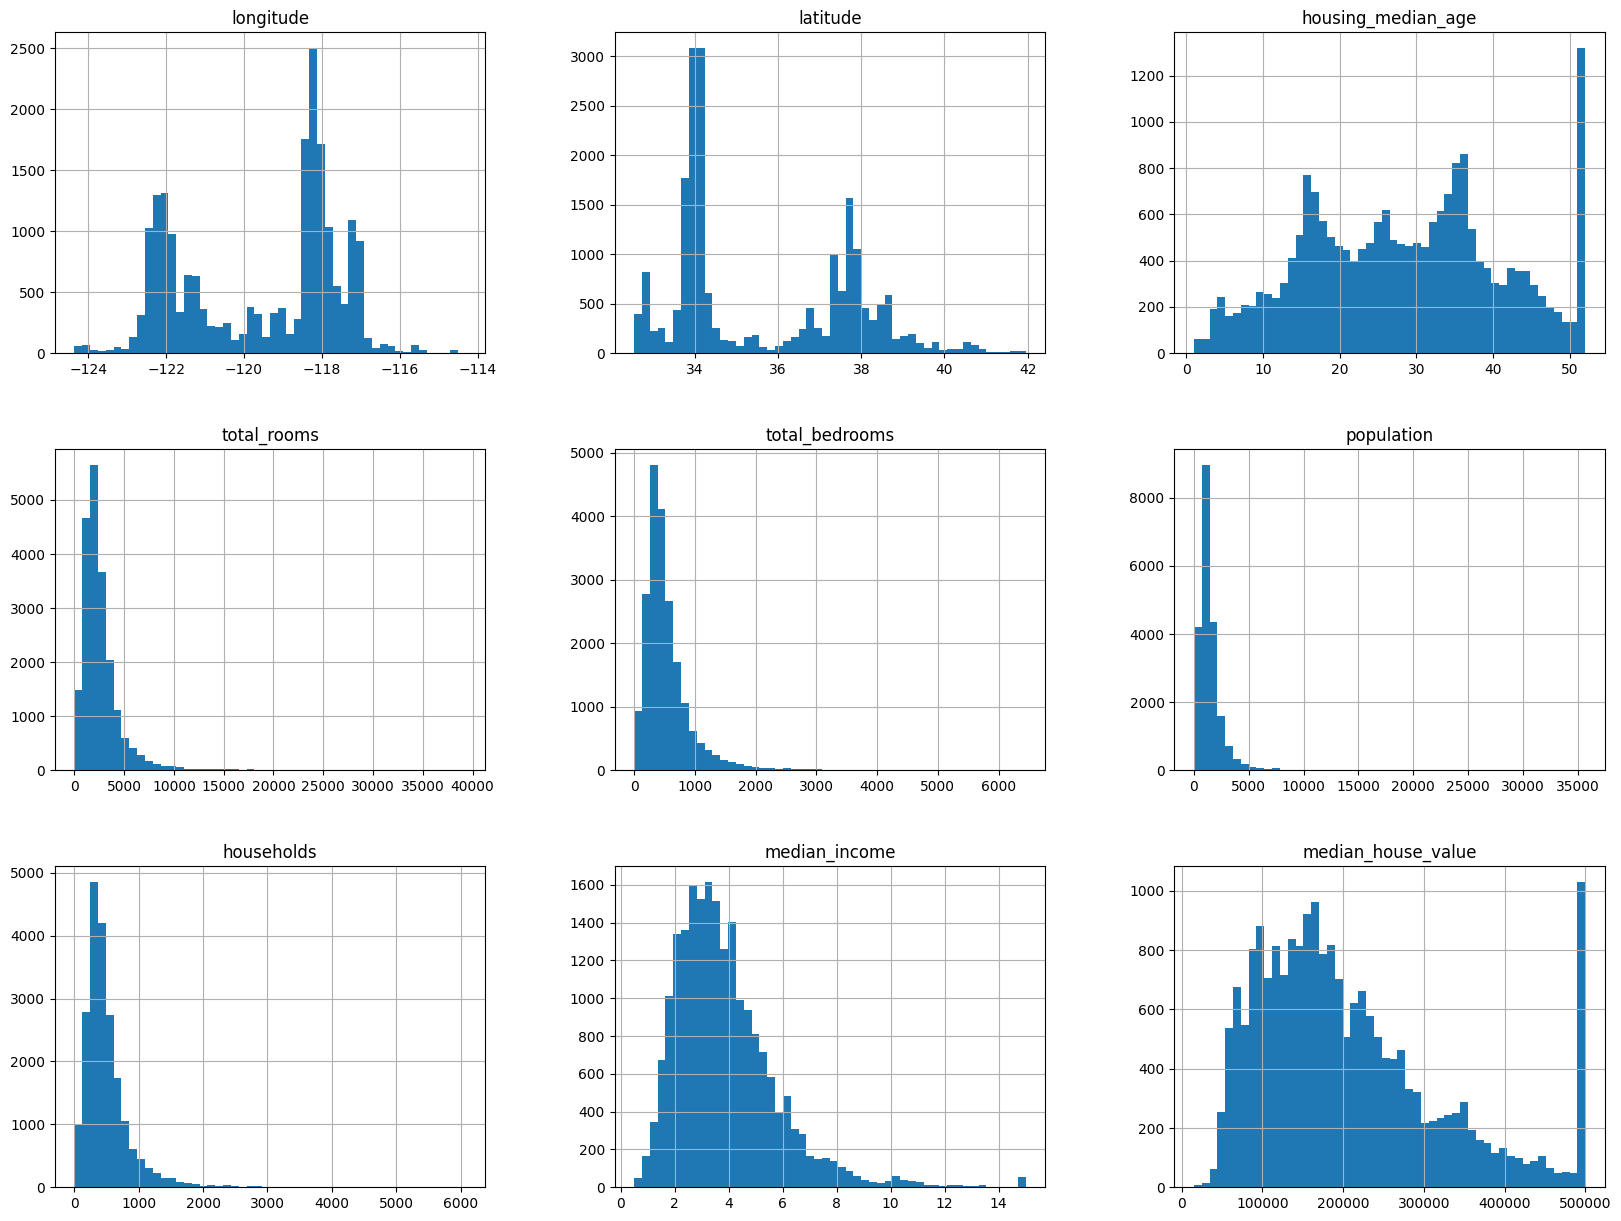

In [67]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()



total_rooms, total_bedrooms, population et households  require log-transform

and presque tous necessite un scalling pour pouvoir "standardiser" les valeurs

### Creating a reliable test set

Il est nécessaire de séparer la donnée afin de ne pas compromettre notre modèle. Il saurait facilement retrouvé la réponse si il a déjà été entrainé dessus

In [68]:
import numpy as np

def split_train_test(data, test_ratio=0.2, seed=42):
    """
    Split the data into a training set and a test set.
    """
    np.random.seed(seed)
    shuffled_idx   = np.random.permutation(len(data))
    test_set_size  = int(len(data) * test_ratio)
    test_idx       = shuffled_idx[:test_set_size]
    train_idx      = shuffled_idx[test_set_size:]
    return data.iloc[train_idx], data.iloc[test_idx]

train_set, test_set = split_train_test(housing, test_ratio=0.2)
print(len(train_set), len(test_set))
    

16512 4128


seed permet de pouvoir toujours retrouver le même résultat d'hasard

In [69]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

from unittest import skip


train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42
)

print(len(train_set), len(test_set))


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
16512 4128


In [70]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx]
    strat_test_set  = housing.loc[test_idx]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

#### Clean Up

In [71]:
for _set in (strat_train_set, strat_test_set):
    _set.drop("income_cat", axis=1, inplace=True)

In [72]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

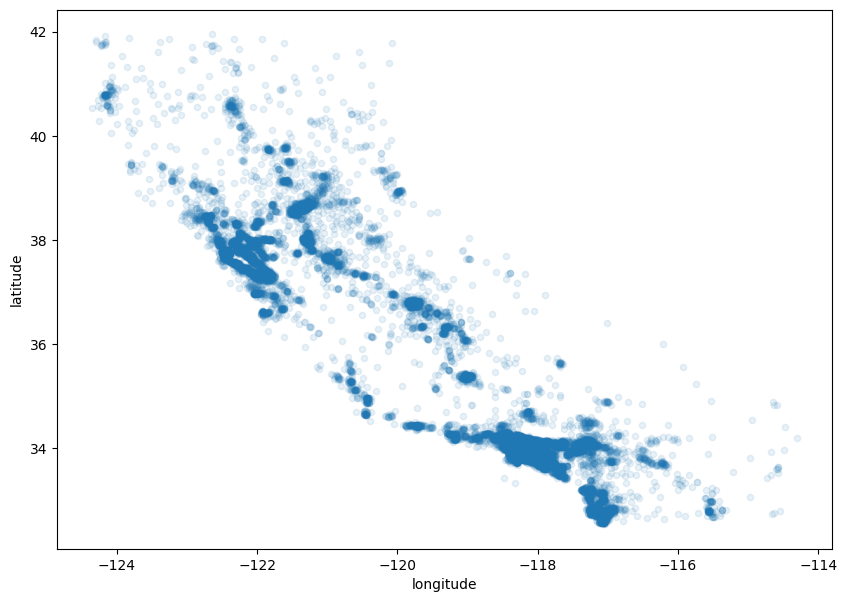

In [73]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10,7))

L'image montre l'emplacement de chaque district.
Il se dessine la carte de la californie et les endroits avec le plus de densité sont les villes cotiéres.

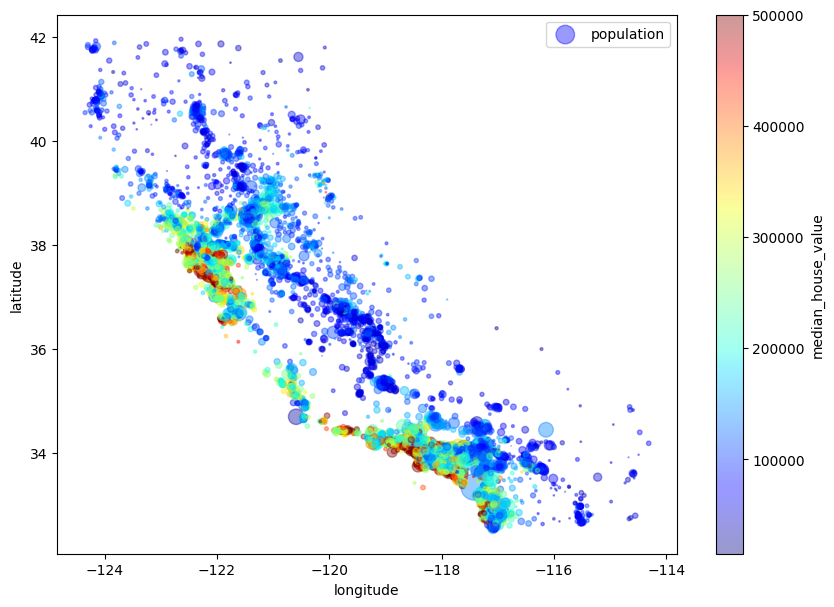

In [74]:
import matplotlib.pyplot as plt

housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    s=housing["population"] / 100,              # bubble size
    label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

What two variables seem most linked to expensive areas? 

Two variables are population and revenu income

In [75]:
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


La plus grande correlation est avec le median income et total room et la négatif avec longitude

## 3 | Feature Engineering


### 3.1 Création de nouvelles features (ratios)


In [76]:
# Création de nouvelles features basées sur les ratios
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Vérification de la corrélation avec median_house_value
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


## 4 | Préparation des données pour le Machine Learning


### 4.1 Séparation des features et labels


In [77]:
# Séparer les features et les labels
housing_labels = housing["median_house_value"].copy()
housing_prep = housing.drop("median_house_value", axis=1).copy()


### 4.2 Pipeline de transformation


In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Colonnes numériques et catégorielles
num_cols = housing_prep.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = housing_prep.select_dtypes(include=['object']).columns.tolist()

# Pipeline pour les colonnes numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline pour les colonnes catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Transformer complet
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Application du pipeline
housing_prepared = full_pipeline.fit_transform(housing_prep)
print(f"Shape après transformation: {housing_prepared.shape}")


Shape après transformation: (16512, 16)


## 5 | Entraînement des modèles


### 5.1 Modèle Linear Regression


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Prédictions sur les données d'entraînement
housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
lin_mae = mean_absolute_error(housing_labels, housing_predictions)

print(f"Linear Regression - RMSE: {lin_rmse:,.0f}, MAE: {lin_mae:,.0f}")


Linear Regression - RMSE: 68,161, MAE: 49,059


### 5.2 Modèle Decision Tree Regressor


In [80]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
tree_mae = mean_absolute_error(housing_labels, housing_predictions)

print(f"Decision Tree - RMSE: {tree_rmse:,.0f}, MAE: {tree_mae:,.0f}")


Decision Tree - RMSE: 0, MAE: 0


### 5.3 Validation croisée


In [81]:
from sklearn.model_selection import cross_val_score

# Validation croisée pour Linear Regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("Linear Regression - Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Std:", lin_rmse_scores.std())

# Validation croisée pour Decision Tree
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

print("\nDecision Tree - Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Std:", tree_rmse_scores.std())


Linear Regression - Scores: [71181.95098096 63825.56512744 67741.07241029 68256.29685279
 66711.2271161  72240.73664717 69981.07976999 68438.51358706
 65946.92067317 70073.85093767]
Mean: 68439.72141026422
Std: 2408.8928462974663

Decision Tree - Scores: [71918.58642103 71384.84501617 68633.80280963 69659.52488314
 67941.65145966 75921.07007104 71837.53328882 72468.1641427
 68601.96049537 68323.32006781]
Mean: 70669.045865536
Std: 2379.810209113841


### 5.4 Modèle Random Forest Regressor


In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
forest_mae = mean_absolute_error(housing_labels, housing_predictions)

print(f"Random Forest - RMSE: {forest_rmse:,.0f}, MAE: {forest_mae:,.0f}")

# Validation croisée
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("\nRandom Forest CV - Mean:", forest_rmse_scores.mean())
print("Std:", forest_rmse_scores.std())


Random Forest - RMSE: 18,644, MAE: 12,057

Random Forest CV - Mean: 50339.50540453655
Std: 2206.1714766286996


## 6 | Fine-tuning des modèles


### 6.1 Grid Search avec Pipeline complet


In [83]:
from sklearn.model_selection import GridSearchCV
import time

# Création d'un pipeline complet (preprocessing + modèle)
full_pipeline_with_model = Pipeline([
    ('preprocess', full_pipeline),
    ('model', RandomForestRegressor(random_state=42))
])

# Paramètres pour Grid Search
param_grid = [
    {'model__n_estimators': [100, 200], 
     'model__max_features': [4, 6, 8],
     'model__max_depth': [10, 20, None]}
]

grid_search = GridSearchCV(
    full_pipeline_with_model, 
    param_grid, 
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

print("Début du Grid Search...")
start_time = time.time()
grid_search.fit(housing_prep, housing_labels)
grid_time = time.time() - start_time

print(f"Grid Search terminé en {grid_time:.2f} secondes")
print("Meilleurs paramètres:", grid_search.best_params_)

best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Meilleur RMSE (CV): {best_rmse:,.0f}")


Début du Grid Search...
Grid Search terminé en 68.91 secondes
Meilleurs paramètres: {'model__max_depth': None, 'model__max_features': 6, 'model__n_estimators': 200}
Meilleur RMSE (CV): 49,101


### 6.2 Randomized Search


In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Distribution des paramètres pour Randomized Search
param_distribs = {
    'model__n_estimators': randint(low=100, high=300),
    'model__max_features': randint(low=4, high=10),
    'model__max_depth': [10, 20, 30, None]
}

rand_search = RandomizedSearchCV(
    full_pipeline_with_model,
    param_distributions=param_distribs,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

print("Début du Randomized Search...")
start_time = time.time()
rand_search.fit(housing_prep, housing_labels)
rand_time = time.time() - start_time

print(f"Randomized Search terminé en {rand_time:.2f} secondes")
print("Meilleurs paramètres:", rand_search.best_params_)

rand_rmse = np.sqrt(-rand_search.best_score_)
print(f"Meilleur RMSE (CV): {rand_rmse:,.0f}")
print(f"\nComparaison:")
print(f"Grid Search: {best_rmse:,.0f} en {grid_time:.2f}s")
print(f"Randomized Search: {rand_rmse:,.0f} en {rand_time:.2f}s")


Début du Randomized Search...
Randomized Search terminé en 85.18 secondes
Meilleurs paramètres: {'model__max_depth': None, 'model__max_features': 6, 'model__n_estimators': 249}
Meilleur RMSE (CV): 49,064

Comparaison:
Grid Search: 49,101 en 68.91s
Randomized Search: 49,064 en 85.18s


### 6.3 Feature Importances


In [85]:
# Récupération du meilleur modèle
best_model = grid_search.best_estimator_
rf_model = best_model.named_steps['model']

# Récupération des noms de features après preprocessing
feature_names = []
for name, transformer, columns in full_pipeline.transformers_:
    if name == 'num':
        # Pour les colonnes numériques
        feature_names.extend(columns)
    elif name == 'cat':
        # Pour les colonnes catégorielles (OneHotEncoder)
        ohe = transformer.named_steps['onehot']
        cat_feature_names = ohe.get_feature_names_out(columns)
        feature_names.extend(cat_feature_names)

# Feature importances
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Top 15 features les plus importantes:")
print(feat_imp.head(15))


Top 15 features les plus importantes:
                       feature  importance
7                median_income    0.322893
12      ocean_proximity_INLAND    0.152468
10    population_per_household    0.108547
9            bedrooms_per_room    0.078868
0                    longitude    0.075677
1                     latitude    0.067215
8          rooms_per_household    0.061601
2           housing_median_age    0.043432
3                  total_rooms    0.018004
5                   population    0.017478
4               total_bedrooms    0.016944
6                   households    0.016419
11   ocean_proximity_<1H OCEAN    0.011597
15  ocean_proximity_NEAR OCEAN    0.004774
14    ocean_proximity_NEAR BAY    0.004010


### 6.4 Analyse des erreurs (Out-of-fold predictions)


Statistiques des résidus:
count     16512.000000
mean       -546.319877
std       49099.339908
min     -301100.700000
25%      -23928.375000
50%       -5741.750000
75%       15561.746250
max      372581.985000
Name: median_house_value, dtype: float64


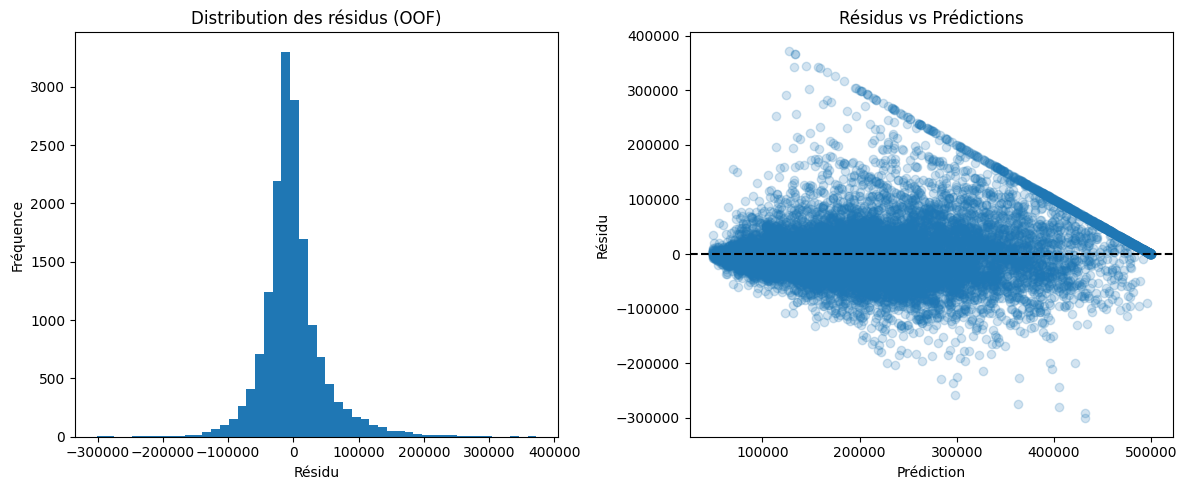

In [86]:
from sklearn.model_selection import cross_val_predict

# Prédictions out-of-fold
oof_pred = cross_val_predict(best_model, housing_prep, housing_labels, cv=5, n_jobs=-1)
residuals = housing_labels - oof_pred

print("Statistiques des résidus:")
print(pd.Series(residuals).describe())

# Visualisation des résidus
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50)
plt.title("Distribution des résidus (OOF)")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
plt.scatter(oof_pred, residuals, alpha=0.2)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Prédiction")
plt.ylabel("Résidu")
plt.title("Résidus vs Prédictions")

plt.tight_layout()
plt.show()


## 7 | Évaluation finale sur le Test Set


### 7.1 Préparation du Test Set


In [89]:
# Séparation des features et labels du test set
X_test = strat_test_set.drop("median_house_value", axis=1).copy()
y_test = strat_test_set["median_house_value"].copy()

# Création des mêmes features que sur le training set
X_test["rooms_per_household"] = X_test["total_rooms"] / X_test["households"]
X_test["bedrooms_per_room"] = X_test["total_bedrooms"] / X_test["total_rooms"]
X_test["population_per_household"] = X_test["population"] / X_test["households"]

print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Test set shape: (4128, 12)
Test labels shape: (4128,)


### 7.2 Prédictions et métriques finales


In [90]:
# Le meilleur modèle inclut déjà le preprocessing dans le pipeline
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

# Métriques finales
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_mae = mean_absolute_error(y_test, final_predictions)

print(f"Test RMSE: {final_rmse:,.0f}")
print(f"Test MAE: {final_mae:,.0f}")
print(f"\nComparaison avec CV RMSE: {best_rmse:,.0f}")
print(f"Différence: {final_rmse - best_rmse:,.0f}")


Test RMSE: 46,834
Test MAE: 31,292

Comparaison avec CV RMSE: 49,101
Différence: -2,267


### 7.3 Intervalle de confiance à 95% pour RMSE


In [ ]:
from scipy import stats

# Calcul de l'intervalle de confiance pour RMSE
errors = final_predictions - y_test
se2 = errors ** 2  
confidence = 0.95
m = len(se2)

ci_mse = stats.t.interval(
    confidence, 
    df=m-1, 
    loc=se2.mean(), 
    scale=stats.sem(se2)
)
ci_rmse = np.sqrt(ci_mse)

print(f"95% CI for RMSE: [{ci_rmse[0]:,.0f}, {ci_rmse[1]:,.0f}]")
print(f"RMSE actuel: {final_rmse:,.0f}")


95% CI for RMSE: [44,872, 48,717]
RMSE actuel: 46,834


### 7.4 Analyse des erreurs par segment


In [92]:
# Analyse par segment géographique
test_df = X_test.copy()
test_df["y_true"] = y_test
test_df["y_pred"] = final_predictions

# Analyse par ocean_proximity
if "ocean_proximity" in test_df.columns:
    is_inland = test_df["ocean_proximity"] == "INLAND"
    
    if is_inland.sum() > 0:
        rmse_inland = np.sqrt(mean_squared_error(
            test_df.loc[is_inland, "y_true"],
            test_df.loc[is_inland, "y_pred"]
        ))
        rmse_other = np.sqrt(mean_squared_error(
            test_df.loc[~is_inland, "y_true"],
            test_df.loc[~is_inland, "y_pred"]
        ))
        
        print(f"RMSE INLAND: {rmse_inland:,.0f}")
        print(f"RMSE non-INLAND: {rmse_other:,.0f}")

# Analyse par quintiles de revenu
test_df["income_cat"] = pd.cut(
    test_df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

for cat in [1, 2, 3, 4, 5]:
    mask = test_df["income_cat"] == cat
    if mask.sum() > 0:
        rmse_cat = np.sqrt(mean_squared_error(
            test_df.loc[mask, "y_true"],
            test_df.loc[mask, "y_pred"]
        ))
        print(f"RMSE Income Cat {cat}: {rmse_cat:,.0f}")


RMSE INLAND: 34,573
RMSE non-INLAND: 51,446
RMSE Income Cat 1: 53,294
RMSE Income Cat 2: 39,349
RMSE Income Cat 3: 45,085
RMSE Income Cat 4: 52,903
RMSE Income Cat 5: 57,666


### 7.5 Sauvegarde du modèle final


In [ ]:
import joblib
import json
import sys
import sklearn


os.makedirs("models", exist_ok=True)


joblib.dump({
    "final_model": final_model,
    "cv_best_rmse": float(best_rmse),
    "test_rmse": float(final_rmse),
    "test_mae": float(final_mae),
    "ci_rmse": [float(ci_rmse[0]), float(ci_rmse[1])],
}, "models/final_release.joblib")

# Métadonnées
meta = {
    "sklearn_version": sklearn.__version__,
    "python_version": sys.version,
    "random_state": 42,
}

with open("models/final_release_meta.json", "w") as f:
    json.dump(meta, f, indent=2)

print("✓ Modèle final et métadonnées sauvegardés dans models/")


✓ Modèle final et métadonnées sauvegardés dans models/


### 7.7 Publication sur Hugging Face

Cette section permet de publier le modèle sur Hugging Face Hub pour le partager et le rendre accessible.


In [8]:
from huggingface_hub import login, upload_folder

# (optional) Login with your Hugging Face credentials
login()

# Push your model files
upload_folder(folder_path="models/", repo_id="BinkyTwin/CaliforniaPrice", repo_type="model")


Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

CommitInfo(commit_url='https://huggingface.co/BinkyTwin/CaliforniaPrice/commit/20034579fe75169f4940d764d6bd5001883d67b9', commit_message='Upload folder using huggingface_hub', commit_description='', oid='20034579fe75169f4940d764d6bd5001883d67b9', pr_url=None, repo_url=RepoUrl('https://huggingface.co/BinkyTwin/CaliforniaPrice', endpoint='https://huggingface.co', repo_type='model', repo_id='BinkyTwin/CaliforniaPrice'), pr_revision=None, pr_num=None)

#### Upload automatique (optionnel)

Si vous êtes déjà connecté, vous pouvez exécuter cette cellule pour uploader automatiquement tous les fichiers.
